In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
df = pd.read_excel('Gadarwara_Q.xlsx')
df

,Dates,Year,Month,Day,RF_1,RF_2,RF_3,RF_4,RF_5,RF_6,RF_7,RF_8,RF_10,LRF,Q,Q(t-1),Q(t-2),Q(t-3),Unnamed: 18
0,1977-06-01,1977,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.60,0.00,0.00,0.00,0
1,1977-06-02,1977,6,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.60,1.60,0.00,0.00,0
2,1977-06-03,1977,6,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.60,1.60,1.60,0.00,0
3,1977-06-04,1977,6,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.60,1.60,1.60,1.60,0
4,1977-06-05,1977,6,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.60,1.60,1.60,1.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15701,2020-05-27,2020,5,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.08,0.09,0.10,0.11,0
15702,2020-05-28,2020,5,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.07,0.08,0.09,0.10,0
15703,2020-05-29,2020,5,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05,0.07,0.08,0.09,0
15704,2020-05-30,2020,5,30,1.1,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0,0.05,0.05,0.07,0.08,0


In [3]:
part1 = df.drop(df.index[11688:15706])
part2 = df.drop(df.index[0:11688])
print(part1.shape, part2.shape)

(11688, 19) (4018, 19)


In [4]:
part1

,Dates,Year,Month,Day,RF_1,RF_2,RF_3,RF_4,RF_5,RF_6,RF_7,RF_8,RF_10,LRF,Q,Q(t-1),Q(t-2),Q(t-3),Unnamed: 18
0,1977-06-01,1977,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.6,0.0,0.0,0.0,0
1,1977-06-02,1977,6,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.6,1.6,0.0,0.0,0
2,1977-06-03,1977,6,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.6,1.6,1.6,0.0,0
3,1977-06-04,1977,6,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.6,1.6,1.6,1.6,0
4,1977-06-05,1977,6,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.6,1.6,1.6,1.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,2009-05-27,2009,5,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
11684,2009-05-28,2009,5,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
11685,2009-05-29,2009,5,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
11686,2009-05-30,2009,5,30,5.5,0.3,1.5,0.0,1.4,0.1,0.0,0.5,0.0,0,0.0,0.0,0.0,0.0,0


In [5]:
part2

,Dates,Year,Month,Day,RF_1,RF_2,RF_3,RF_4,RF_5,RF_6,RF_7,RF_8,RF_10,LRF,Q,Q(t-1),Q(t-2),Q(t-3),Unnamed: 18
11688,2009-06-01,2009,6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0
11689,2009-06-02,2009,6,2,0.0,0.8,0.0,0.0,0.0,0.0,1.2,0.1,0.0,0,0.00,0.00,0.00,0.00,0
11690,2009-06-03,2009,6,3,0.0,0.0,0.0,0.0,0.0,0.0,8.4,0.0,0.0,0,0.00,0.00,0.00,0.00,0
11691,2009-06-04,2009,6,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,0
11692,2009-06-05,2009,6,5,12.7,0.6,3.5,0.0,3.3,0.3,0.0,1.1,0.0,0,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15701,2020-05-27,2020,5,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.08,0.09,0.10,0.11,0
15702,2020-05-28,2020,5,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.07,0.08,0.09,0.10,0
15703,2020-05-29,2020,5,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.05,0.07,0.08,0.09,0
15704,2020-05-30,2020,5,30,1.1,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0,0.05,0.05,0.07,0.08,0


In [6]:
med1 = part1['Q'].median()
mean1 = part1['Q'].mean()
std1 = part1['Q'].std()
CV1 = (std1/mean1)*100
print(med1, mean1, std1, CV1)

4.3285 44.14474302712508 185.17052785039823 419.46223978836787


In [7]:
med2 = part2['Q'].median()
mean2 = part2['Q'].mean()
std2 = part2['Q'].std()
CV2 = (std2/mean2)*100
print(med2, mean2, std2, CV2)

2.5949999999999998 50.00353882023047 145.90794037042386 291.79522852369064


In [8]:
zero_count_1 = (part1['Q'] == 0).sum() 
perc_0values1 = (zero_count_1/11688)*100
print(zero_count_1, perc_0values1)

196 1.676933607118412


In [9]:
zero_count_2 = (part2['Q'] == 0).sum() 
perc_0values2 = (zero_count_2/4018)*100
print(zero_count_2, perc_0values2)

861 21.428571428571427


# MLR STARTS HERE

In [10]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

[0.49922392] 22.10663122965281 0.406745928018882 12626.717998742692


<function matplotlib.pyplot.show(close=None, block=None)>

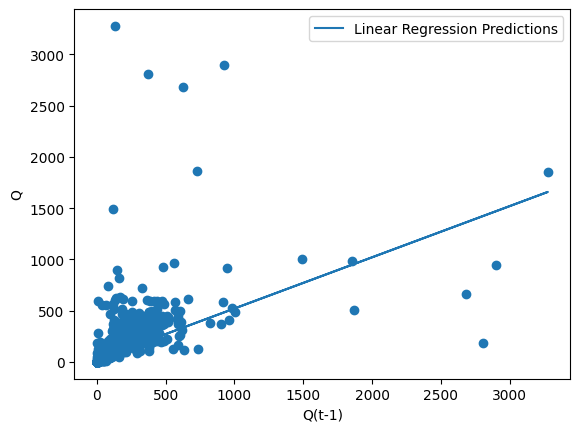

In [11]:
# independent variable = Q(t-1)
model1 = linear_model.LinearRegression()
model1.fit(part1[['Q(t-1)']], part1.Q)
Q_pred1 = model1.predict(part2[['Q(t-1)']])
R2_score1 = r2_score(part2[['Q']], Q_pred1)
MSE1 = mean_squared_error(part2[['Q']], Q_pred1)
print(model1.coef_, model1.intercept_, R2_score1, MSE1)
plt.scatter(part2[['Q(t-1)']], part2[['Q']])
plt.plot(part2[['Q(t-1)']], Q_pred1, label='Linear Regression Predictions')
plt.xlabel('Q(t-1)')
plt.ylabel('Q')
plt.legend()
plt.show

[0.3640955] 28.071840749763762 0.2695431879091389 15546.917606029412


<function matplotlib.pyplot.show(close=None, block=None)>

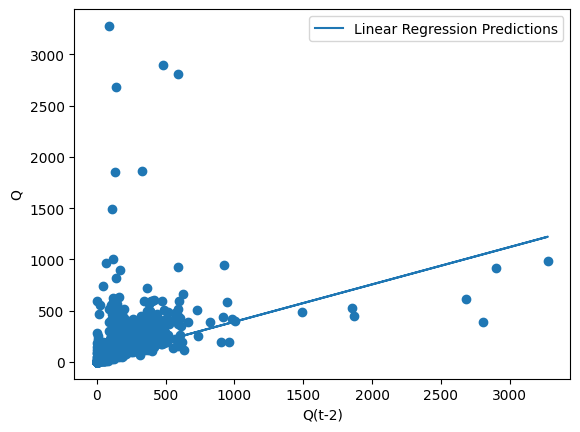

In [12]:
# independent variable = Q(t-2)
model2 = linear_model.LinearRegression()
model2.fit(part1[['Q(t-2)']], part1.Q)
Q = part2[['Q']]
Q_pred2 = model2.predict(part2[['Q(t-2)']])
R2_score2 = r2_score(part2[['Q']], Q_pred2)
MSE2 = mean_squared_error(part2[['Q']], Q_pred2)
print(model2.coef_, model2.intercept_, R2_score2, MSE2)
plt.scatter(part2[['Q(t-2)']], part2[['Q']])
plt.plot(part2[['Q(t-2)']], Q_pred2, label='Linear Regression Predictions')
plt.xlabel('Q(t-2)')
plt.ylabel('Q')
plt.legend()
plt.show

[0.33996761] 29.13696014122965 0.22104552976766545 16579.133450594745


<function matplotlib.pyplot.show(close=None, block=None)>

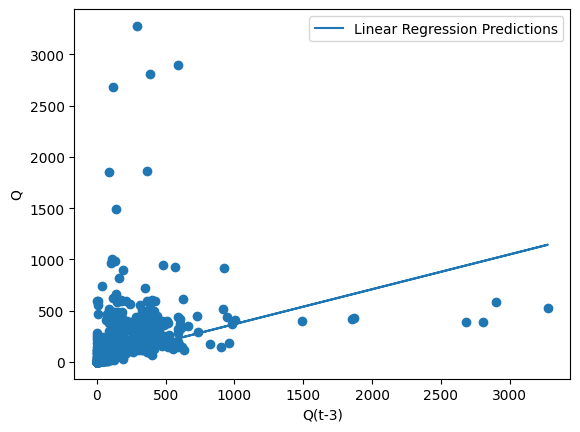

In [13]:
# independent variable = Q(t-3)
model3 = linear_model.LinearRegression()
model3.fit(part1[['Q(t-3)']], part1.Q)
Q = part2[['Q']]
Q_pred3 = model3.predict(part2[['Q(t-3)']])
R2_score3 = r2_score(part2[['Q']], Q_pred3)
MSE3 = mean_squared_error(part2[['Q']], Q_pred3)
print(model3.coef_, model3.intercept_, R2_score3, MSE3)
plt.scatter(part2[['Q(t-3)']], part2[['Q']])
plt.plot(part2[['Q(t-3)']], Q_pred3, label='Linear Regression Predictions')
plt.xlabel('Q(t-3)')
plt.ylabel('Q')
plt.legend()
plt.show

In [14]:
# independent variable = Q(t-1), Q(t-2)
model4 = linear_model.LinearRegression()
model4.fit(part1[['Q(t-1)', 'Q(t-2)']], part1.Q)
Q_pred4 = model4.predict(part2[['Q(t-1)', 'Q(t-2)']])
R2_score4 = r2_score(part2[['Q']], Q_pred4)
MSE4 = mean_squared_error(part2[['Q']], Q_pred4)
print(model4.coef_, model4.intercept_, R2_score4, MSE4)

[0.42284112 0.1530031 ] 18.724248137693408 0.43764247255642885 11969.121239721011


In [15]:
# independent variable = Q(t-1), Q(t-3)
model5 = linear_model.LinearRegression()
model5.fit(part1[['Q(t-1)', 'Q(t-3)']], part1.Q)
Q_pred5 = model5.predict(part2[['Q(t-1)', 'Q(t-3)']])
R2_score5 = r2_score(part2[['Q']], Q_pred5)
MSE5 = mean_squared_error(part2[['Q']], Q_pred5)
print(model5.coef_, model5.intercept_, R2_score5, MSE5)

[0.4328203  0.18237969] 16.98689763582803 0.4418756117729895 11879.023830092729


In [16]:
# independent variable = Q(t-2), Q(t-3)
model6 = linear_model.LinearRegression()
model6.fit(part1[['Q(t-2)', 'Q(t-3)']], part1.Q)
Q_pred6 = model6.predict(part2[['Q(t-2)', 'Q(t-3)']])
R2_score6 = r2_score(part2[['Q']], Q_pred6)
MSE6 = mean_squared_error(part2[['Q']], Q_pred6)
print(model6.coef_, model6.intercept_, R2_score6, MSE6)

[0.25889969 0.2107187 ] 23.413560256674167 0.3118616471254244 14646.218772423535


In [17]:
# independent variable = Q(t-1), Q(t-2), Q(t-3)
model7 = linear_model.LinearRegression()
model7.fit(part1[['Q(t-1)', 'Q(t-2)', 'Q(t-3)']], part1.Q)
Q_pred7 = model7.predict(part2[['Q(t-1)', 'Q(t-2)', 'Q(t-3)']])
R2_score7 = r2_score(part2[['Q']], Q_pred7)
MSE7 = mean_squared_error(part2[['Q']], Q_pred7)
print(model7.coef_, model7.intercept_, R2_score7, MSE7)

[0.39996363 0.08977862 0.14952302] 15.92454200064919 0.45192812481427336 11665.06786527802
